<a href="https://colab.research.google.com/github/dlvvkfl88/MSAISCHOOL/blob/main/MS_AI_SCHOOL_41%EC%9D%BC%EC%B0%A8_%ED%86%B5%EA%B3%84%EA%B8%B0%EB%B0%98_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 시계열 특성을 고려한 이상치 탐지
• 이동 평균과 이동 표준 편차를 사용한 이상치 탐지 실습

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# pd.set_option('display.max_rows', 500)
#시계열 데이터 생성
np.random.seed(42)
dates = pd.date_range (start='2023-01-01', periods=500, freq='D') 
values = np.random.randn(500)
#데이터프레임 생성
data = pd.DataFrame({ 'Date': dates, 'Value': values})
#이동 평균과 이동 표준편차 계산
window_size = 7
data['MovingAverage'] = data['Value'].rolling(window=window_size).mean() 
data['MovingStd'] = data['Value'].rolling(window=window_size).std() 
print(data[ 'MovingAverage'])
print(data['MovingStd'])

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
495    0.518818
496    0.244692
497    0.218640
498   -0.117869
499   -0.326465
Name: MovingAverage, Length: 500, dtype: float64
0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
495    0.860378
496    1.016955
497    1.026795
498    0.925535
499    1.032557
Name: MovingStd, Length: 500, dtype: float64


In [5]:
#임계값 설정
threshold_multiplier = 2 # 임계값 배수 
data['Threshold'] = data[ 'MovingAverage'] + threshold_multiplier * data['MovingStd'] 
print(data['Threshold'])
#이상치 탐지
data['Outlier'] = data['Value']> data['Threshold']
print(data['Outlier'])


0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
495    2.239575
496    2.278602
497    2.272230
498    1.733201
499    1.738648
Name: Threshold, Length: 500, dtype: float64
0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Name: Outlier, Length: 500, dtype: bool


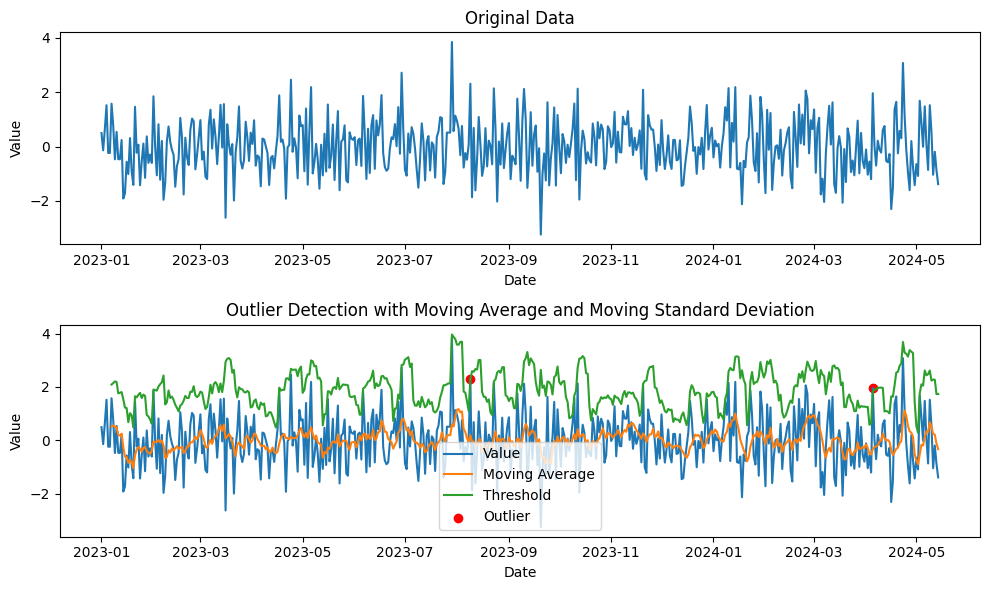

In [7]:
#시계열 데이터 시각화
plt.figure(figsize=(10, 6))
#원본 데이터 그래프
plt.subplot(2, 1, 1)
plt.plot(data['Date'], data['Value'])
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Original Data')
#이동 평균, 이동 표준편차, 임계값, 이상치 그래프
plt.subplot(2, 1, 2)
plt.plot(data['Date'], data['Value'], label='Value')

plt.plot(data['Date'], data['MovingAverage'], label='Moving Average')
plt.plot(data['Date'], data['Threshold'], label='Threshold')
plt.scatter (data[data['Outlier']]['Date'], data[data['Outlier']]['Value'], color='red', label='Outlier')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Outlier Detection with Moving Average and Moving Standard Deviation') 
plt.legend()
plt.tight_layout()
plt.show()

# 지수 평활법을 이용한 이상치 탐지

In [8]:
import pandas as pd 
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [11]:
# 시계열 데이터 생성
dates = pd.date_range(start='2023-01-01', periods=100,freq='D')
values= [10,12,11,15,9,13,8,14,10,16] + [10]*90 # 이상치 포함된 데이터

# 데이터 프레임 생성 
data = pd.DataFrame({
    'Date' : dates,
    'value': values
})

print(data)

         Date  value
0  2023-01-01     10
1  2023-01-02     12
2  2023-01-03     11
3  2023-01-04     15
4  2023-01-05      9
..        ...    ...
95 2023-04-06     10
96 2023-04-07     10
97 2023-04-08     10
98 2023-04-09     10
99 2023-04-10     10

[100 rows x 2 columns]


## 지수 평활법 모델 학습

In [12]:
model = ExponentialSmoothing(data['value'], trend='add')
model_fit = model.fit()

In [14]:
# 추세 계산 
trend = model_fit.predict(start=0, end=len(data['value']) - 1)
# 추세에서의 편차 계산
deviation = data['value'] - trend


print(deviation)

0    -1.390967
1     0.819502
2    -0.176589
3     3.918825
4    -2.388085
        ...   
95   -0.012197
96   -0.009370
97   -0.006721
98   -0.004258
99   -0.001982
Length: 100, dtype: float64


# 이상치 탐지 및 시각화

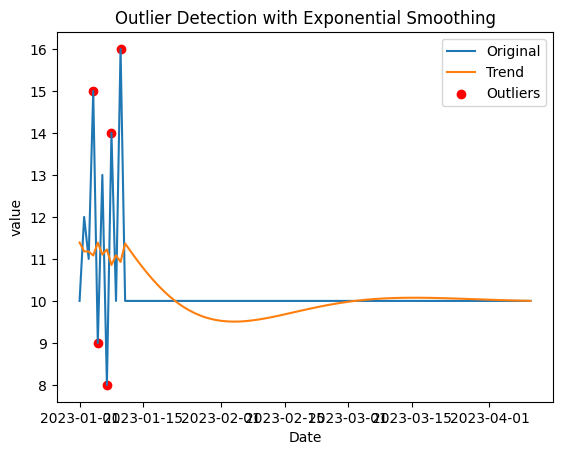

In [19]:
# 이상치 탐지
threshold =2 
outliers = abs(deviation) >threshold

# 시계열 데이터 시각화
plt.plot(data['Date'], data['value'], label='Original')
plt.plot(data['Date'], trend, label='Trend')
plt.scatter(data[outliers]['Date'], data[outliers]['value'], color='red', label='Outliers')
plt.xlabel('Date')
plt.ylabel('value')
plt.title('Outlier Detection with Exponential Smoothing')
plt.legend()
plt.show()

# Z-점수 기반 이상치 탐지 실습

In [20]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

In [22]:
# 시계열 데이터 생성
dates = pd.date_range(start='2023-01-01', periods=100,freq='D')
values = np.random.randn(100)*10 # 정규분포를 따르는 데이터 생성

# 이상치 추가
values[20] = 50 # 이상치 추가
# 데이터 프레임 생성
data = pd.DataFrame({
    'Date': dates,
    'Value': values
})

print(data)

         Date      Value
0  2023-01-01   7.569886
1  2023-01-02  -9.221653
2  2023-01-03   8.696059
3  2023-01-04  13.556379
4  2023-01-05   4.134349
..        ...        ...
95 2023-04-06  -3.095464
96 2023-04-07   3.261330
97 2023-04-08 -12.511136
98 2023-04-09   9.240270
99 2023-04-10  -1.849021

[100 rows x 2 columns]


### 이상치 탐지

In [25]:
# z_scroes 계산
z_scores = np.abs(stats.zscore(data['Value'])) 

# 임계값 설정
threshold = 3

# z_scores 가 임계값을 초과하는지 확인
outliers = z_scores > threshold

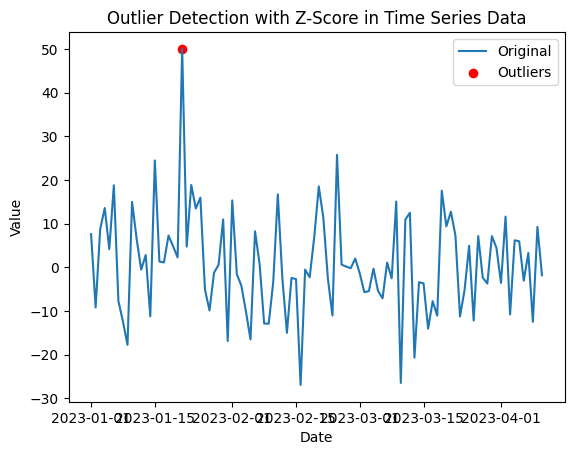

Detected Outliers:
20    50.0
Name: Value, dtype: float64


In [26]:
# 이상치 시각화 
plt.plot(data['Date'], data['Value'], label='Original')
plt.scatter(data[outliers]['Date'], data[outliers]['Value'], color='red', label='Outliers')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Outlier Detection with Z-Score in Time Series Data')
plt.legend()
plt.show()
 
# 이상치 출력 
outlier_values = data[outliers]['Value']
print("Detected Outliers:")
print(outlier_values)

# 스무딩 실습

In [27]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


## 시계열 데이터, 데이터 프레임,원본 시계열 데이터 시각화

In [28]:
dates = pd.date_range(start='2023-01-01', periods=100, freq='D')
values= np.random.randn(100)*10 # 정규 분포를 따르는 데이터 생성

data = pd.DataFrame({
    'Date':dates,
    'Value':values
})

print(data)

         Date      Value
0  2023-01-01  -5.227230
1  2023-01-02  10.490092
2  2023-01-03  -7.043437
3  2023-01-04 -14.084613
4  2023-01-05 -15.566292
..        ...        ...
95 2023-04-06  10.531529
96 2023-04-07  -0.395552
97 2023-04-08   6.815007
98 2023-04-09   0.283184
99 2023-04-10   0.297561

[100 rows x 2 columns]


## 이동평균을 사용한 스무딩

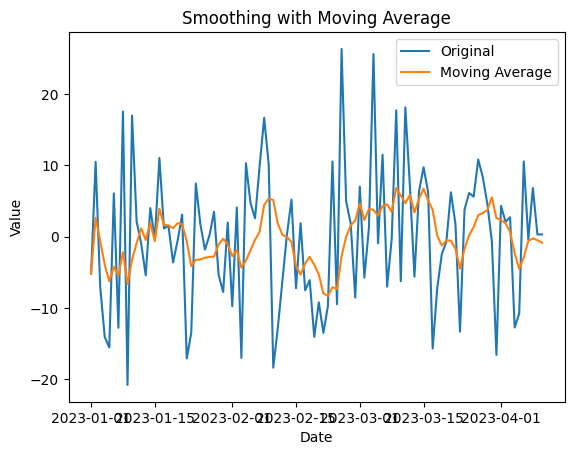

In [30]:
# 이동평균 윈도우 크기 설정
window_size = 7

# 이동평균 계산
data['MovingAverage'] = data['Value'].rolling(window=window_size, min_periods=1).mean()

# 시계열 데이터 시각화
plt.plot(data['Date'], data['Value'], label='Original')
plt.plot(data['Date'], data['MovingAverage'], label='Moving Average')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Smoothing with Moving Average')
plt.legend()
plt.show()

### 스무딩 --> 지수평활법

In [32]:
#지수평활법을 사용한 스무딩
alpha = 0.3
#지수평활법의 평활 계수 설정

#지수평활법 계산
data['ExponentialSmoothing'] = data['Value'].ewm(alpha=alpha).mean()

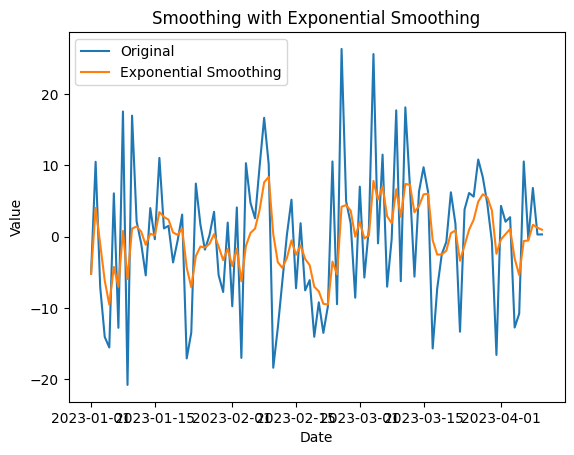

In [33]:
#시계열 데이터 시각화
plt.plot(data['Date'], data['Value'], label='Original')
plt.plot(data['Date'], data[ 'ExponentialSmoothing' ], label='Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Smoothing with Exponential Smoothing')
plt.legend()
plt.show()

## 트랜드 실습


In [34]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [35]:
# 시계열 데이터 생성
dates = pd.date_range(start='2023-01-01', periods=100, freq= 'D')
values= [10,12,11,15,9,13,8,14,10,16] * 10

# 데이터 프레임생 생성 
data = pd.DataFrame({
    'Date':dates,
    'Values':values
})

print(data)

         Date  Values
0  2023-01-01      10
1  2023-01-02      12
2  2023-01-03      11
3  2023-01-04      15
4  2023-01-05       9
..        ...     ...
95 2023-04-06      13
96 2023-04-07       8
97 2023-04-08      14
98 2023-04-09      10
99 2023-04-10      16

[100 rows x 2 columns]


### 주기설정, 주기성 분해

In [39]:
periods= 7 # 이는 데이터가 7일 간격으로 반복되는 패턴을 가지고 있다는 가정 !!!

#주기성 분해
result = seasonal_decompose(data['Values'], model= 'additive', period= periods)

print(result)

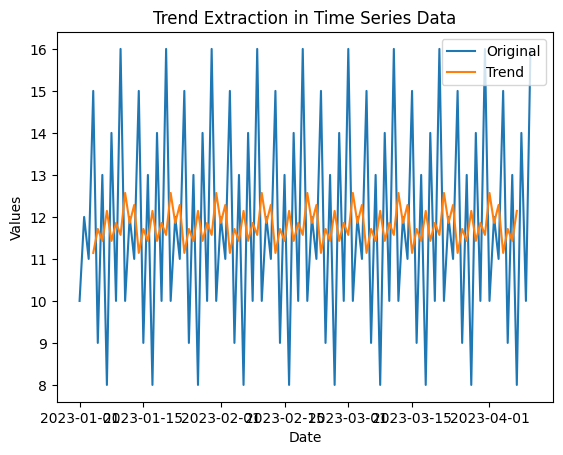

In [41]:
# 추세 계산
trend = result.trend
 
# 시계열 데이터 시각화
plt.plot(data['Date'], data['Values'], label='Original')
plt.plot(data['Date'], trend, label='Trend')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Trend Extraction in Time Series Data')
plt.legend()
plt.show()

## 주어진 시계열 데이터에서 이상치 탐지 및 처리 실습

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from scipy import stats

### 시계열 데이터 생성, 이상치 추가, 데이터 프레임생성

In [47]:
# 데이터 생성
dates = pd.date_range(start='2023-01-01', periods=100, freq='D')
values= np.random.randn(100)*10

# 이상치 추가
values[10] = 50

# 데이터 프레임 생성
data = pd.DataFrame({
    'Date': dates,
    'Value' : values
})

print(data)
print(data['Value'].iloc[10])

         Date      Value
0  2023-01-01   3.686733
1  2023-01-02  -3.933388
2  2023-01-03   0.287448
3  2023-01-04  12.784519
4  2023-01-05   1.910991
..        ...        ...
95 2023-04-06  -2.811003
96 2023-04-07  17.976865
97 2023-04-08   6.408429
98 2023-04-09  -5.711790
99 2023-04-10   5.725828

[100 rows x 2 columns]
50.0


values라는 컬럼에 10번째 행에 50이라는 이상치 넣어봄 그후 10번째 행 데이터 확인해보니 50 인거 확인

In [51]:
# 이상치 탐지 
z_scores = np.abs(stats.zscore(data['Value']))

# 임계치 설정
thredhold = 3 

# z-scores 임계값을 초과하는 체크 
outliers = z_scores > thredhold

# 이상치를 결측치로 처리
data.loc[outliers,'Value'] = np.nan

# 결측치 보간 
data['Value'] = data['Value'].interpolate() # Value의 결측치를 보간처리

print(data['Value'].iloc[10]) # 결측치 행 보간 처리  

11.912025254846995


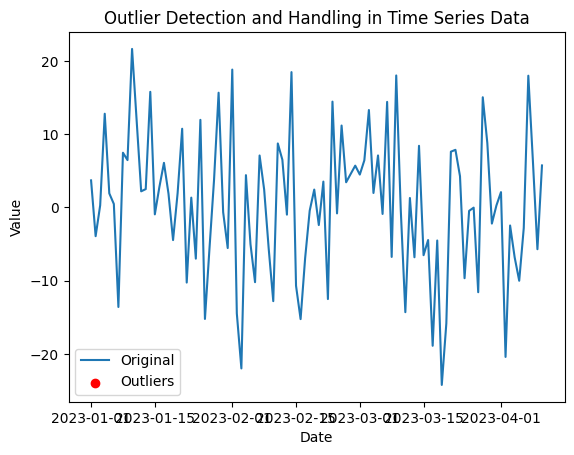

이상치 처리된 데이터 확인 >>  11.912025254846995


In [53]:
# 시계열 데이터 시각화
plt.plot(data['Date'], data['Value'], label='Original')
plt.scatter(data[outliers]['Date'], data[outliers]['Value'], color='red', label='Outliers')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Outlier Detection and Handling in Time Series Data')
plt.legend()
plt.show()
 
# 처리된 데이터 확인
print("이상치 처리된 데이터 확인 >> " , data['Value'].iloc[10])

# 표준화 실습

In [54]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [57]:
# 시계열 데이터 생성
dates= pd.date_range(start='2023-01-01', periods=100, freq='D')
values= [10,12,11,15,9,13,8,14,10,16] * 10

# 데이터 프레임 생성

data = pd.DataFrame({
    'Date':dates,
    'Value':values
})

print(data)
# 표준화 값 추출
x = data['Value'].values.reshape(-1,1)

# 표준화 적용 
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)

# 표준화 된 값을 새로운 열로추가
data['Value_scaler'] = x_scaler
print(data['Value_scaler'])


         Date  Value
0  2023-01-01     10
1  2023-01-02     12
2  2023-01-03     11
3  2023-01-04     15
4  2023-01-05      9
..        ...    ...
95 2023-04-06     13
96 2023-04-07      8
97 2023-04-08     14
98 2023-04-09     10
99 2023-04-10     16

[100 rows x 2 columns]
0    -0.713746
1     0.079305
2    -0.317221
3     1.268883
4    -1.110272
        ...   
95    0.475831
96   -1.506798
97    0.872357
98   -0.713746
99    1.665408
Name: Value_scaler, Length: 100, dtype: float64


In [61]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

   Value
0     10
1     20
2     30
3     40
4     50


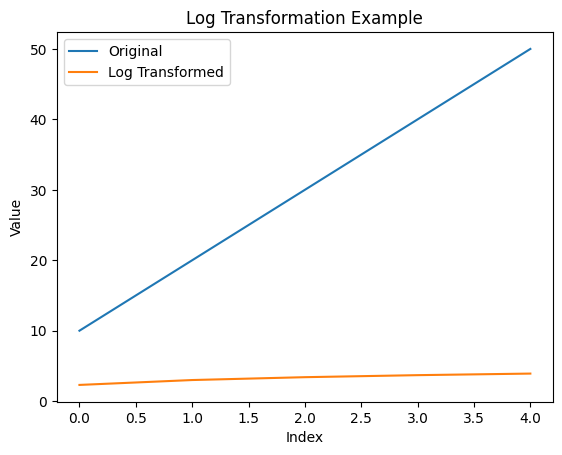

   Value  LogValue
0     10  2.302585
1     20  2.995732
2     30  3.401197
3     40  3.688879
4     50  3.912023


In [62]:

#예시 데이터 생성
data = pd.DataFrame({'Value': [10, 20, 30, 40, 50]}) 
print(data)
#로그 변환적용
data['LogValue'] = np.log(data['Value'])
# 데이터 시각화
plt.plot(data['Value'], label='Original')
plt.plot(data['LogValue'], label='Log Transformed')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Log Transformation Example')
plt.legend()
plt.show()
print(data)

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [64]:
# 예시 데이터 생성
data = pd.DataFrame({'Value': [10,20,40,80,150]})

# 차분 
data['DiffValue'] = data['Value'].diff()
print(data)

   Value  DiffValue
0     10        NaN
1     20       10.0
2     40       20.0
3     80       40.0
4    150       70.0


## 박스콕스 실습

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import boxcox

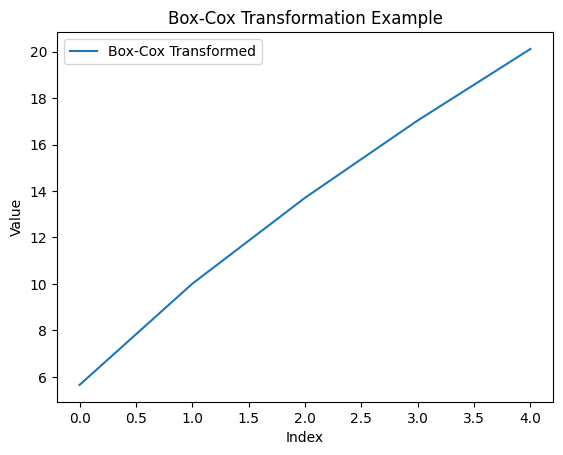

In [67]:
# 예시 데이터 생성
data = pd.DataFrame({
    'Value':[10,20,30,40,50]
})

# 박스 콕스 변환 수행 
transformed_data, lambda_ = boxcox(data['Value'])

# 변환된 데이터와 lambda 값 출력
# 변환된 데이터 시각화
plt.plot(transformed_data, label='Box-Cox Transformed')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Box-Cox Transformation Example')
plt.legend()
plt.show()

# 데이터에 적합한 정규화와 변환 방법 선택하는 실습

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import boxcox

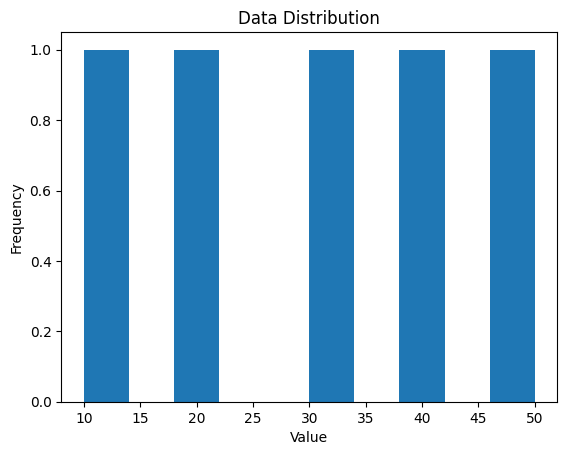

In [73]:
# 예시 데이터 생성
data = pd.DataFrame({'Value':[10,20,30,40,50]})

# 데이터 분포 확인
plt.hist(data['Value'])
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Data Distribution')
plt.show()

### 비정규분포 형태 -> 비선형 변환인 로그 변환 또는 박스-콕스 변환

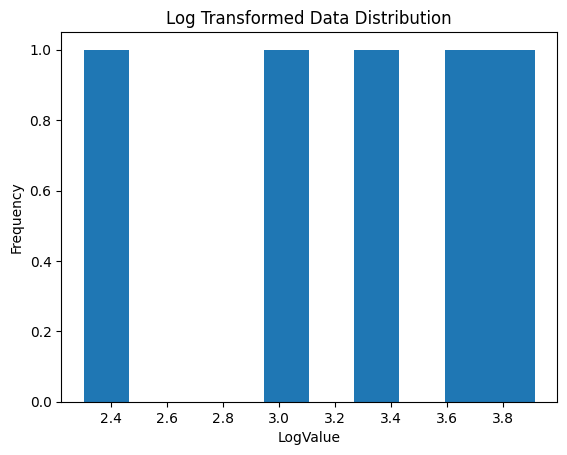

In [74]:
data['LogValue'] = np.log(data['Value'])

# 로그 변환 후 데이터 분포 확인
plt.hist(data['LogValue'])
plt.xlabel('LogValue')
plt.ylabel('Frequency')
plt.title('Log Transformed Data Distribution')
plt.show()

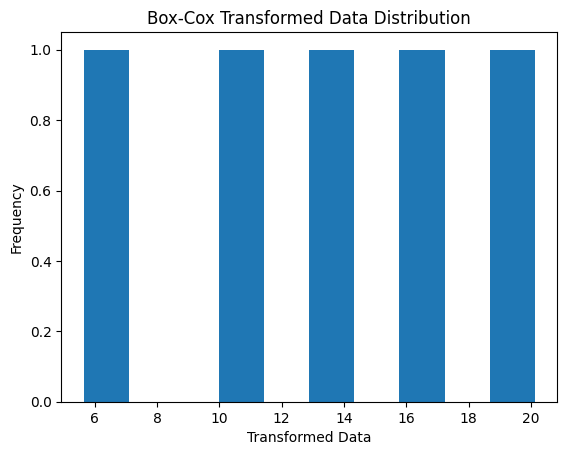

Transformed Data:
[ 5.65138796 10.00808054 13.70844282 17.03810568 20.11674201]
Lambda value: 0.6902965345833846


In [75]:
transformed_data , lambda_ = boxcox(data['Value'])
# 변환된 데이터 분포 확인
plt.hist(transformed_data)
plt.xlabel('Transformed Data')
plt.ylabel('Frequency')
plt.title('Box-Cox Transformed Data Distribution')
plt.show()
 
# 변환된 데이터와 lambda 값 출력
print("Transformed Data:")
print(transformed_data)
print("Lambda value:", lambda_)

In [76]:
import numpy as np
import pandas as pd

In [78]:
n =100 # 데이터 포인트 수 
ar_params = [0.7] # 자기회귀수 
ma_params = [] # 이동평균 계수
residuals = np.random.normal(0,1,n) # 잔차 생성

# AR(1) 모델 생성
data = [0] # 초기값 설정
for i in range(1,n):
  data.append(ar_params[0]* data[i-1]+residuals[i])

# 데이터 프레임생성
df = pd.DataFrame({'Date':pd.date_range(start='2022-01-01', periods=n, freq='D'), 'Value':data})
df = df.set_index('Date')

# 데이터 확인 
print(df.head())

               Value
Date                
2022-01-01  0.000000
2022-01-02 -2.896255
2022-01-03  0.060996
2022-01-04 -0.096892
2022-01-05  1.040358


In [79]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_acf

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                            AutoReg Model Results                             
Dep. Variable:                  Value   No. Observations:                  100
Model:                     AutoReg(1)   Log Likelihood                -150.366
Method:               Conditional MLE   S.D. of innovations              1.105
Date:                Wed, 31 May 2023   AIC                            306.733
Time:                        08:18:40   BIC                            314.518
Sample:                    01-02-2022   HQIC                           309.883
                         - 04-10-2022                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0957      0.113      0.848      0.396      -0.125       0.317
Value.L1       0.7088      0.071      9.938      0.000       0.569       0.849
                                    Roots           

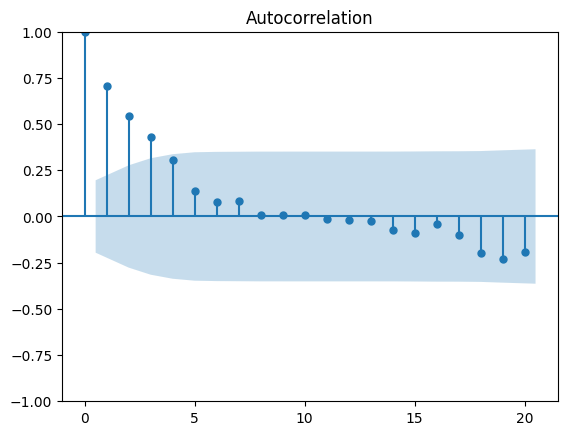

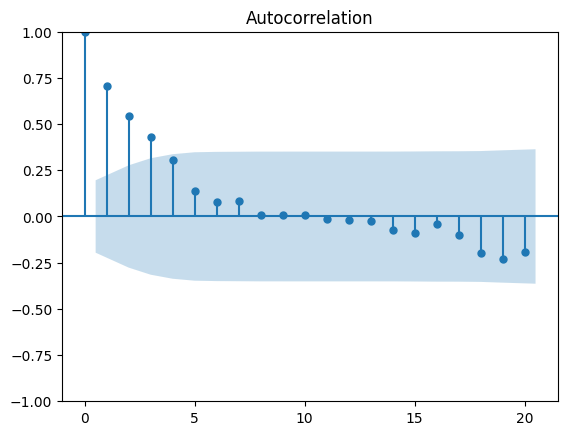

In [81]:
# AR(1) 모델 적합
model = AutoReg(df['Value'], lags=1)
results = model.fit()

# 모델 정보 출력
print(results.summary())

# ACF 그래프 출력
plot_acf(df['Value'], lags=20)

# MA 모델링 실습


In [82]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA


In [88]:
#시계열 데이터 생성
np.random.seed(0)
n=100
#데이터 포인트 수
#이동평균 계수
ma_params = [0.4, -0.2]
residuals = np.random.normal(0, 1, n)
#MA(2) 모델 생성
data = [0,0] #초기값 설정
for i in range(2, n):
  data.append(ma_params[0]* residuals[i-1] + ma_params[1] + residuals[1-2] + residuals[i])


#데이터프레임 생성
#ma_params 변수는 MA(2) 모델의 이동평균 계수(coefficient)를 의미합니다. 이 경우, [0.4.0.2]로 설정
#잔차 생성
#residuals 변수는 잔차를 나타내는 시계열 데이터입니다. np.rando m.normal() 함수를 활용하여 평균이 0이고 표준편차가 1인 정규분 for문에서 잔차를 생성합니다.

df = pd.DataFrame({'Value': data}) 
print (df)  # data 변수는 MA(2) 모델을 따르는 시계열 데이터를 저장하는 리스트입니다. 초기값은 0으로 설정되어 있으며, 이후 for 루프를 통해 이동평균 계수와 잔 차를 이용하여 시계열 데이터를 생성합니다.

       Value
0   0.000000
1   0.000000
2   1.340790
3   2.834378
4   2.965905
..       ...
95  1.051109
96  0.495119
97  1.992060
98  1.043250
99  0.654744

[100 rows x 1 columns]


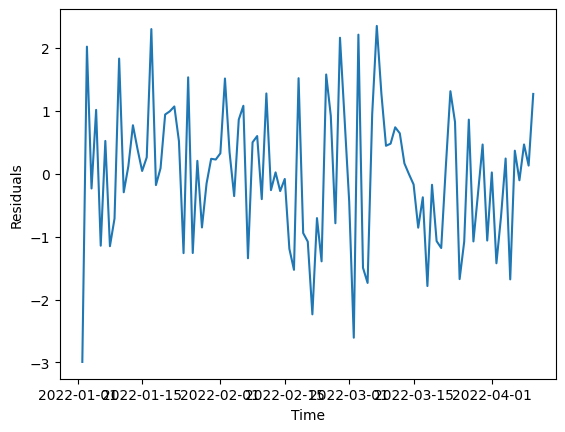

In [89]:
# 잔차 시계열 그래프 출력
plt.plot(results.resid)
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()